In [0]:
#Colab para o final do cap 3 de MPT

In [2]:
#importando as bibliotecas
import pandas as pd  #bibioteca responsável para o tratamento e limpeza dos dados
import numpy as np #biblioteca utilizada para o tratamento eficiente de dados numéricos
import datetime  #biblioteca utilizada para trabalhar com datas

In [3]:
#importando os dados para o google colab
#from google.colab import files
#uploaded = files.upload()
uploaded = pd.read_csv('/home/igorbaio/Documentos/BootcampAnalistaMachineLearning/Modulo_2/Aulas_praticas/Cap3/BL-Flickr-Images-Book.csv')

In [4]:
#importando os dados como um dataframe
df_flickr_book=pd.read_csv('/home/igorbaio/Documentos/BootcampAnalistaMachineLearning/Modulo_2/Aulas_praticas/Cap3/BL-Flickr-Images-Book.csv') 
#dataset que contém informações sobre diferentes livros existentes na "British Library"

In [5]:
#conhecendo o dataset 
df_flickr_book.head()

,Identifier,Edition Statement,Place of Publication,Date of Publication,Publisher,Title,Author,Contributors,Corporate Author,Corporate Contributors,Former owner,Engraver,Issuance type,Flickr URL,Shelfmarks
0,206,NaN,London,1879 [1878],S. Tinsley & Co.,Walter Forbes. [A novel.] By A. A,A. A.,"FORBES, Walter.",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 12641.b.30.
1,216,NaN,London; Virtue & Yorston,1868,Virtue & Co.,All for Greed. [A novel. The dedication signed...,"A., A. A.","BLAZE DE BURY, Marie Pauline Rose - Baroness",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 12626.cc.2.
2,218,NaN,London,1869,"Bradbury, Evans & Co.",Love the Avenger. By the author of “All for Gr...,"A., A. A.","BLAZE DE BURY, Marie Pauline Rose - Baroness",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 12625.dd.1.
3,472,NaN,London,1851,James Darling,"Welsh Sketches, chiefly ecclesiastical, to the...","A., E. S.","Appleyard, Ernest Silvanus.",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 10369.bbb.15.
4,480,"A new edition, revised, etc.",London,1857,Wertheim & Macintosh,"[The World in which I live, and my place in it...","A., E. S.","BROOME, John Henry.",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 9007.d.28.


In [6]:
#obtendo informações sobre o dataset
df_flickr_book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8287 entries, 0 to 8286
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Identifier              8287 non-null   int64  
 1   Edition Statement       773 non-null    object 
 2   Place of Publication    8287 non-null   object 
 3   Date of Publication     8106 non-null   object 
 4   Publisher               4092 non-null   object 
 5   Title                   8287 non-null   object 
 6   Author                  6509 non-null   object 
 7   Contributors            8287 non-null   object 
 8   Corporate Author        0 non-null      float64
 9   Corporate Contributors  0 non-null      float64
 10  Former owner            1 non-null      object 
 11  Engraver                0 non-null      float64
 12  Issuance type           8287 non-null   object 
 13  Flickr URL              8287 non-null   object 
 14  Shelfmarks              8287 non-null   

In [7]:
#realizando o drop de colunas 
colunas_retiradas = ['Edition Statement', 'Corporate Author','Corporate Contributors','Former owner', 'Engraver','Contributors','Issuance type','Shelfmarks'] #lista que contém as colunas a serem retiradas
df_flickr_book.drop(columns=colunas_retiradas,axis=1,inplace=True)

In [8]:
df_flickr_book.head()

,Identifier,Place of Publication,Date of Publication,Publisher,Title,Author,Flickr URL
0,206,London,1879 [1878],S. Tinsley & Co.,Walter Forbes. [A novel.] By A. A,A. A.,http://www.flickr.com/photos/britishlibrary/ta...
1,216,London; Virtue & Yorston,1868,Virtue & Co.,All for Greed. [A novel. The dedication signed...,"A., A. A.",http://www.flickr.com/photos/britishlibrary/ta...
2,218,London,1869,"Bradbury, Evans & Co.",Love the Avenger. By the author of “All for Gr...,"A., A. A.",http://www.flickr.com/photos/britishlibrary/ta...
3,472,London,1851,James Darling,"Welsh Sketches, chiefly ecclesiastical, to the...","A., E. S.",http://www.flickr.com/photos/britishlibrary/ta...
4,480,London,1857,Wertheim & Macintosh,"[The World in which I live, and my place in it...","A., E. S.",http://www.flickr.com/photos/britishlibrary/ta...


In [9]:
df_flickr_book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8287 entries, 0 to 8286
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Identifier            8287 non-null   int64 
 1   Place of Publication  8287 non-null   object
 2   Date of Publication   8106 non-null   object
 3   Publisher             4092 non-null   object
 4   Title                 8287 non-null   object
 5   Author                6509 non-null   object
 6   Flickr URL            8287 non-null   object
dtypes: int64(1), object(6)
memory usage: 453.3+ KB


In [10]:
#verificando se existe um identificador único para o dataset (chave)
print(df_flickr_book['Identifier'].is_unique)

True


In [11]:
#contando a quantidade de valores únicos
df_flickr_book['Identifier'].nunique()

8287

In [12]:
df_flickr_book.loc[1905:, 'Date of Publication'].head(10) #seleciona as linhas que contém a data de publicação do indice 1905 até o final do arquivo

1905         1879
1906         1886
1907         1844
1908    1861-1909
1909         1884
1910         1885
1911         1834
1912         1837
1913         1867
1914         1830
Name: Date of Publication, dtype: object

In [13]:
#tratando as datas de publicação de cada um dos livros através das expressões regulares
expre_regular = r'^(\d{4})'   #define a expressão regular que deve ser utilizada para cada uma das datas de publicação (encontra o conjunto de 4 dígitos)
extr = df_flickr_book['Date of Publication'].str.extract(expre_regular, expand=False)  #aplica o modelo de extração através da expressão regular definida

In [14]:
extr[1905:]

1905    1879
1906    1886
1907    1844
1908    1861
1909    1884
        ... 
8282    1838
8283    1831
8284     NaN
8285    1834
8286    1834
Name: Date of Publication, Length: 6382, dtype: object

In [15]:
#aplicando ao dataset e convertendo para numérico
df_flickr_book['Date of Publication']=pd.to_numeric(extr)

In [16]:
#verificando o dataset
df_flickr_book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8287 entries, 0 to 8286
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Identifier            8287 non-null   int64  
 1   Place of Publication  8287 non-null   object 
 2   Date of Publication   7316 non-null   float64
 3   Publisher             4092 non-null   object 
 4   Title                 8287 non-null   object 
 5   Author                6509 non-null   object 
 6   Flickr URL            8287 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 453.3+ KB


In [17]:
#contando a quantidade de valores nulos existentes
df_flickr_book['Date of Publication'].isnull().sum()  # o isnull() retorna uma serie com a resposta para a pergunta (isNull?)

971

In [18]:
df_flickr_book['Date of Publication'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
8282    False
8283    False
8284     True
8285    False
8286    False
Name: Date of Publication, Length: 8287, dtype: bool

In [19]:
df_flickr_book.dropna(subset=['Date of Publication'],inplace=True)  #elimina as linhas que possuem valores nulos
df_flickr_book['Date of Publication']=df_flickr_book['Date of Publication'].astype(int)  #transforma os float em int

In [20]:
df_flickr_book.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7316 entries, 0 to 8286
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Identifier            7316 non-null   int64 
 1   Place of Publication  7316 non-null   object
 2   Date of Publication   7316 non-null   int64 
 3   Publisher             3576 non-null   object
 4   Title                 7316 non-null   object
 5   Author                5782 non-null   object
 6   Flickr URL            7316 non-null   object
dtypes: int64(2), object(5)
memory usage: 457.2+ KB


In [21]:
#identificando os locais de publicação dos livros
df_flickr_book['Place of Publication'].head(10)

0                       London
1     London; Virtue & Yorston
2                       London
3                       London
4                       London
5                       London
6                       London
8                      London]
9                       London
10                    Coventry
Name: Place of Publication, dtype: object

In [22]:
#identificando os locais que possuem a cidade de Londres como local de publicação
df_flickr_book['Place of Publication'].str.contains('London').head(10)

0      True
1      True
2      True
3      True
4      True
5      True
6      True
8      True
9      True
10    False
Name: Place of Publication, dtype: bool

In [23]:
london = df_flickr_book['Place of Publication'].str.contains('London')  #cria a serie que contém os valores True e False para a cidade de Londres
oxford=df_flickr_book['Place of Publication'].str.contains('Oxford')  #cria a serie que contém os valores True e False para a cidade de Oxford

In [24]:
df_flickr_book['Place of Publication']=np.where(london, 'London',np.where(oxford, 'Oxford',df_flickr_book['Place of Publication'].str.replace('-', ' ')))  #aplica o where para preencher cada uma das sentenças com o local correto

In [33]:
df_flickr_book.head()

,Identifier,Place of Publication,Date of Publication,Publisher,Title,Author,Flickr URL
0,206,London,1879,S. Tinsley & Co.,Walter Forbes. [A novel.] By A. A,A. A.,http://www.flickr.com/photos/britishlibrary/ta...
1,216,London,1868,Virtue & Co.,All for Greed. [A novel. The dedication signed...,"A., A. A.",http://www.flickr.com/photos/britishlibrary/ta...
2,218,London,1869,"Bradbury, Evans & Co.",Love the Avenger. By the author of “All for Gr...,"A., A. A.",http://www.flickr.com/photos/britishlibrary/ta...
3,472,London,1851,James Darling,"Welsh Sketches, chiefly ecclesiastical, to the...","A., E. S.",http://www.flickr.com/photos/britishlibrary/ta...
4,480,London,1857,Wertheim & Macintosh,"[The World in which I live, and my place in it...","A., E. S.",http://www.flickr.com/photos/britishlibrary/ta...


**Trabalhando Com Valores Sem Sentido**

In [34]:
#importando os dados para o google colab
#from google.colab import files
#uploaded = files.upload()

In [37]:
#importando um novo dataset
pima_dataset = pd.read_csv('/home/igorbaio/Documentos/BootcampAnalistaMachineLearning/Modulo_2/Aulas_praticas/Cap3/pima-indians-diabetes.csv', header=None)
pima_dataset.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


0. Numero de vezes em que ficou grávida.
1. Concentração de glicose no plasma.
2. Pressão diastólica (mm Hg).
3. Triceps skinfold thickness (mm).
4. Insulina em jejum (mu U/ml).
5. Índice de massa corporal (weight in kg/(height in m)^2).
6. Diabetes pedigree function.
7. Idade.
8. Possui ou não diabetes (1 ou 0).

In [38]:
pima_dataset.info()  #encontra os tipos de valores e valores nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       768 non-null    int64  
 1   1       768 non-null    int64  
 2   2       768 non-null    int64  
 3   3       768 non-null    int64  
 4   4       768 non-null    int64  
 5   5       768 non-null    float64
 6   6       768 non-null    float64
 7   7       768 non-null    int64  
 8   8       768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [41]:
(pima_dataset.describe()) #resumo da estatística descritiva do dataset

,0,1,2,3,4,5,6,7,8
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [44]:
pima_dataset.drop(columns=[0,8],axis=1)[pima_dataset.eq(0).any(1)] #verificando onde existem valores "estranhos iguais a 0" - coluna 0 e 8 podem ter valores nulos

,1,2,3,4,5,6,7
0,148,72,35,0,33.6,0.627,50
1,85,66,29,0,26.6,0.351,31
2,183,64,0,0,23.3,0.672,32
3,89,66,23,94,28.1,0.167,21
4,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...
763,101,76,48,180,32.9,0.171,63
764,122,70,27,0,36.8,0.340,27
765,121,72,23,112,26.2,0.245,30
766,126,60,0,0,30.1,0.349,47


In [45]:
#contando a quantidade de valores nulos em cada uma das colunas que não podem
print((pima_dataset[[1,2,3,4,5]] == 0).sum())

1      5
2     35
3    227
4    374
5     11
dtype: int64


In [46]:
#substituindo os valores 0 por NaN
pima_dataset[[1,2,3,4,5]] = pima_dataset[[1,2,3,4,5]].replace(0, np.NaN)

In [47]:
pima_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       768 non-null    int64  
 1   1       763 non-null    float64
 2   2       733 non-null    float64
 3   3       541 non-null    float64
 4   4       394 non-null    float64
 5   5       757 non-null    float64
 6   6       768 non-null    float64
 7   7       768 non-null    int64  
 8   8       768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [48]:
pima_dataset.isnull().sum() #mostra a quantidade de valores nulos existentes em cada uma das colunas

0      0
1      5
2     35
3    227
4    374
5     11
6      0
7      0
8      0
dtype: int64

**Tratando os Valores Nulos**

In [49]:
#apenas removendo as colunas que contém valores nulos
df_remove_nan=pima_dataset.dropna()
df_remove_nan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 3 to 765
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       392 non-null    int64  
 1   1       392 non-null    float64
 2   2       392 non-null    float64
 3   3       392 non-null    float64
 4   4       392 non-null    float64
 5   5       392 non-null    float64
 6   6       392 non-null    float64
 7   7       392 non-null    int64  
 8   8       392 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 30.6 KB


In [50]:
df_remove_nan.head()

,0,1,2,3,4,5,6,7,8
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
13,1,189.0,60.0,23.0,846.0,30.1,0.398,59,1


In [51]:
pima_dataset.head()

,0,1,2,3,4,5,6,7,8
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


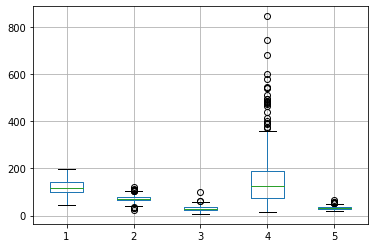

In [52]:
#identificando os outliers
pima_dataset.boxplot([1,2,3,4,5]) #"bolinhas' fora das caixas indicam os possíveis outliers

In [53]:
#preenchendo os valores com a média
df_nan_media=pima_dataset.fillna(pima_dataset.mean())
df_nan_media.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       768 non-null    int64  
 1   1       768 non-null    float64
 2   2       768 non-null    float64
 3   3       768 non-null    float64
 4   4       768 non-null    float64
 5   5       768 non-null    float64
 6   6       768 non-null    float64
 7   7       768 non-null    int64  
 8   8       768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [54]:
df_nan_media.head()

,0,1,2,3,4,5,6,7,8
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1


**Trabalhando com dados categóricos**

In [56]:
#importando os dados para o google colab
#from google.colab import files
#uploaded = files.upload()

In [57]:
df_carros = pd.read_csv('/home/igorbaio/Documentos/BootcampAnalistaMachineLearning/Modulo_2/Aulas_praticas/Cap3/imports-85.txt', sep=",", header=None,na_values="?") #importando o dataset

In [58]:
df_carros.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [59]:
headers = {0:"symboling", 1:"normalized_losses", 2:"make", 3:"fuel_type", 4:"aspiration",
           5:"num_doors", 6:"body_style", 7:"drive_wheels",8: "engine_location",
           9:"wheel_base", 10:"length", 11:"width",12: "height", 13:"curb_weight",
           14:"engine_type", 15:"num_cylinders",16: "engine_size", 17:"fuel_system",
           18:"bore", 19:"stroke", 20:"compression_ratio", 21:"horsepower", 22:"peak_rpm",
           23:"city_mpg", 24:"highway_mpg", 25:"price"}

In [60]:
df_carros.rename(columns=headers,inplace=True)
df_carros.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [61]:
df_carros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized_losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel_type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num_doors          203 non-null    object 
 6   body_style         205 non-null    object 
 7   drive_wheels       205 non-null    object 
 8   engine_location    205 non-null    object 
 9   wheel_base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb_weight        205 non-null    int64  
 14  engine_type        205 non-null    object 
 15  num_cylinders      205 non-null    object 
 16  engine_size        205 non

In [62]:
df_carros.dtypes.eq('object').sum() #conta a quantidade de "object" existente no dataset

10

In [63]:
#selecionando apenas os dados categóricos
df_carros_string = df_carros.select_dtypes(include=['object']).copy()#realiza uma cópia do dataset apenas para as colunas do tipo string
df_carros_string.head()

,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,engine_type,num_cylinders,fuel_system
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi


In [64]:
df_carros_string.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   make             205 non-null    object
 1   fuel_type        205 non-null    object
 2   aspiration       205 non-null    object
 3   num_doors        203 non-null    object
 4   body_style       205 non-null    object
 5   drive_wheels     205 non-null    object
 6   engine_location  205 non-null    object
 7   engine_type      205 non-null    object
 8   num_cylinders    205 non-null    object
 9   fuel_system      205 non-null    object
dtypes: object(10)
memory usage: 16.1+ KB


In [65]:
df_carros_string.isnull().sum()  #encontra onde existem valores nulos

make               0
fuel_type          0
aspiration         0
num_doors          2
body_style         0
drive_wheels       0
engine_location    0
engine_type        0
num_cylinders      0
fuel_system        0
dtype: int64

In [66]:
df_carros_string.dropna(inplace=True) #realiza o drop para os valores nulos
df_carros_string.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 203 entries, 0 to 204
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   make             203 non-null    object
 1   fuel_type        203 non-null    object
 2   aspiration       203 non-null    object
 3   num_doors        203 non-null    object
 4   body_style       203 non-null    object
 5   drive_wheels     203 non-null    object
 6   engine_location  203 non-null    object
 7   engine_type      203 non-null    object
 8   num_cylinders    203 non-null    object
 9   fuel_system      203 non-null    object
dtypes: object(10)
memory usage: 17.4+ KB


In [67]:
df_carros_string["num_cylinders"].value_counts()  #conta os valores para cada uma das "classes"

four      157
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: num_cylinders, dtype: int64

In [68]:
#utilizando o dicionário e a função "replace" para transformar em numericos
mapeamento_classes = {"num_doors":     {"four": 4, "two": 2},
                "num_cylinders": {"four": 4, "six": 6, "five": 5, "eight": 8,
                                  "two": 2, "twelve": 12, "three":3 }} 

In [69]:
#aplicando a função replace
df_carros_string.replace(mapeamento_classes, inplace=True)
df_carros_string.head()

,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,engine_type,num_cylinders,fuel_system
0,alfa-romero,gas,std,2,convertible,rwd,front,dohc,4,mpfi
1,alfa-romero,gas,std,2,convertible,rwd,front,dohc,4,mpfi
2,alfa-romero,gas,std,2,hatchback,rwd,front,ohcv,6,mpfi
3,audi,gas,std,4,sedan,fwd,front,ohc,4,mpfi
4,audi,gas,std,4,sedan,4wd,front,ohc,5,mpfi


In [70]:
#aplicando o label encoding
df_carros_string["body_style"] = df_carros_string["body_style"].astype('category')  #define a coluna de 'body_style' como categórica
df_carros_string.dtypes

make                 object
fuel_type            object
aspiration           object
num_doors             int64
body_style         category
drive_wheels         object
engine_location      object
engine_type          object
num_cylinders         int64
fuel_system          object
dtype: object

In [71]:
#após definir como categórica é possível realizar o procedimento de label encoding
df_carros_string["body_style_cat"] = df_carros_string["body_style"].cat.codes #aplica a codificação para a coluna "body_style" e cria a coluna "body_style_cat"
df_carros_string.head()

,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,engine_type,num_cylinders,fuel_system,body_style_cat
0,alfa-romero,gas,std,2,convertible,rwd,front,dohc,4,mpfi,0
1,alfa-romero,gas,std,2,convertible,rwd,front,dohc,4,mpfi,0
2,alfa-romero,gas,std,2,hatchback,rwd,front,ohcv,6,mpfi,2
3,audi,gas,std,4,sedan,fwd,front,ohc,4,mpfi,3
4,audi,gas,std,4,sedan,4wd,front,ohc,5,mpfi,3


In [200]:
df_carros_string.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 203 entries, 0 to 204
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   make             203 non-null    object  
 1   fuel_type        203 non-null    object  
 2   aspiration       203 non-null    object  
 3   num_doors        203 non-null    int64   
 4   body_style       203 non-null    category
 5   drive_wheels     203 non-null    object  
 6   engine_location  203 non-null    object  
 7   engine_type      203 non-null    object  
 8   num_cylinders    203 non-null    int64   
 9   fuel_system      203 non-null    object  
 10  body_style_cat   203 non-null    int8    
dtypes: category(1), int64(2), int8(1), object(7)
memory usage: 16.5+ KB


In [72]:
#aplicando o One-Hot_encoding
df_carros_string['drive_wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [75]:
df_carros_string['drive_wheels'].nunique()

3

In [73]:
pd.get_dummies(df_carros_string, columns=["drive_wheels"]).head() #aplicando o hot encoding sobre os valores tração dos carros

,make,fuel_type,aspiration,num_doors,body_style,engine_location,engine_type,num_cylinders,fuel_system,body_style_cat,drive_wheels_4wd,drive_wheels_fwd,drive_wheels_rwd
0,alfa-romero,gas,std,2,convertible,front,dohc,4,mpfi,0,0,0,1
1,alfa-romero,gas,std,2,convertible,front,dohc,4,mpfi,0,0,0,1
2,alfa-romero,gas,std,2,hatchback,front,ohcv,6,mpfi,2,0,0,1
3,audi,gas,std,4,sedan,front,ohc,4,mpfi,3,0,1,0
4,audi,gas,std,4,sedan,front,ohc,5,mpfi,3,1,0,0
